## Gráfico de Barras
Vamos construir um gráfico de barras usando os dados do dataset Ebola.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ebola.csv')

,Countries,Type,Number_of_cases,Death
0,Guinea,comfirmed cases,3351,2083
1,Guinea,Probable cases,453,453
2,Sierra Leone,comfirmed cases,8704,3589
3,Sierra Leone,Probable cases,287,208
4,Sierra Leone,Suspected cases,5131,158


In [ ]:
df.head()

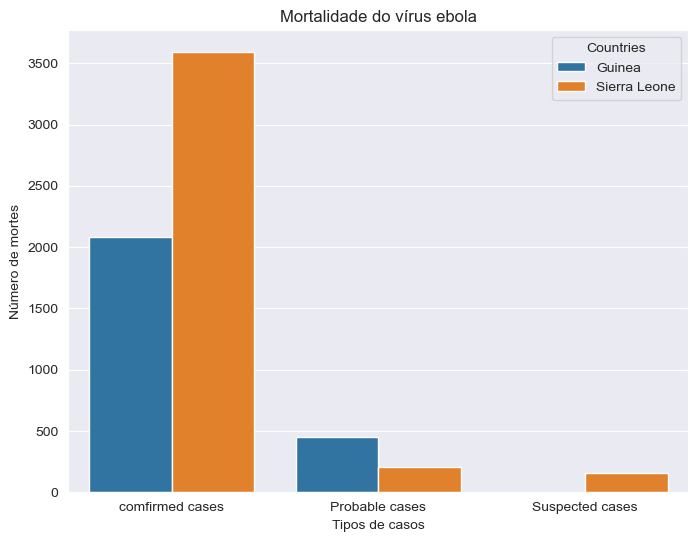

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
sns.barplot(x='Type', y='Death', hue='Countries', data=df, errorbar=None)
plt.title('Mortalidade do vírus ebola')
plt.xlabel('Tipos de casos')
plt.ylabel('Número de mortes')
plt.show()


Vamos agora trabalhar com o dataset Migrants.csv. O primeiro passo é entender esse dataset, então vamos exibir alguns registros inicialmente.

In [7]:
df = pd.read_csv('migrants.csv', encoding='latin-1')

In [8]:
df

,Web ID,Region_of_Incident,Reported_Year,Number_Dead,Total_Dead_and_Missing
0,44025,US-Mexico Border,2017,10.0,10
1,44026,Mediterranean,2017,NaN,2
2,44027,Mediterranean,2017,1.0,1
3,44017,US-Mexico Border,2017,1.0,1
4,44024,US-Mexico Border,2017,1.0,1
...,...,...,...,...,...
3177,39207,US-Mexico Border,2014,1.0,1
3178,39368,Europe,2014,1.0,1
3179,39257,US-Mexico Border,2014,1.0,1
3180,39256,US-Mexico Border,2014,1.0,1


Vamos ver as diferentes regiões onde os incidentes aconteceram.

In [9]:
df['Region_of_Incident'].unique()

array(['US-Mexico Border', 'Mediterranean', 'Middle East', 'Europe',
       'Central America', 'Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Southeast Asia', 'North Africa', 'Horn of Africa',
       'North America', 'East Asia', 'South America'], dtype=object)

In [12]:
df = df[~df['Region_of_Incident'].isin(['North America', 'South America', 'East Asia', 'South Asia'])]
df['Region_of_Incident'].unique()

array(['US-Mexico Border', 'Mediterranean', 'Middle East', 'Europe',
       'Central America', 'Caribbean', 'Sub-Saharan Africa',
       'Southeast Asia', 'North Africa', 'Horn of Africa'], dtype=object)

In [14]:
df2 = pd.crosstab(df['Region_of_Incident'], df['Reported_Year'], values=df['Total_Dead_and_Missing'], aggfunc='sum')
df2

Reported_Year,2014,2015,2016,2017
Region_of_Incident,,,,
Caribbean,73,68,105,156
Central America,116,101,181,76
Europe,20,136,62,90
Horn of Africa,265,135,235,170
Mediterranean,3283,3785,5143,3095
Middle East,39,36,114,208
North Africa,89,801,1382,467
Southeast Asia,814,789,187,295
Sub-Saharan Africa,268,74,92,387


Agora vamos criar um gráfico de barras mostrando o número de mortos e desaparecidos no ano de 2016.

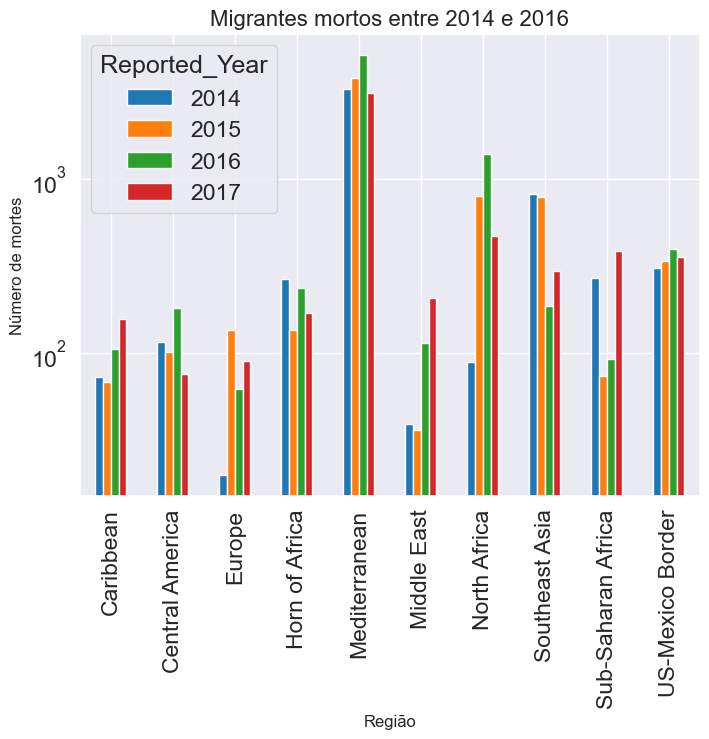

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
sns.set_context('notebook', font_scale=1.5, rc={"font.size": 14, 'axes.titlesize': 16, 'axes.labelsize': 12})
df2.plot(kind='bar', stacked=False)
plt.title('Migrantes mortos entre 2014 e 2016')
plt.ylabel('Número de mortes')
plt.xlabel('Região')
# plt.yscale('log') 😈
plt.show()